# Handling Imbalanced Dataset

### Under Sampling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14,8
RANDOM_SEED = 42
LABELS = ["Normal","Fraud"]

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
columns = df.columns.tolist()

### seperate Independent and Dependent features
columns = [c for c in columns if c not in ["Class"]]

target = "Class"

state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_Outliers = state.uniform(low=0,high=1,size=(X.shape[0], X.shape[1]))

print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


Text(0, 0.5, 'Frequency')

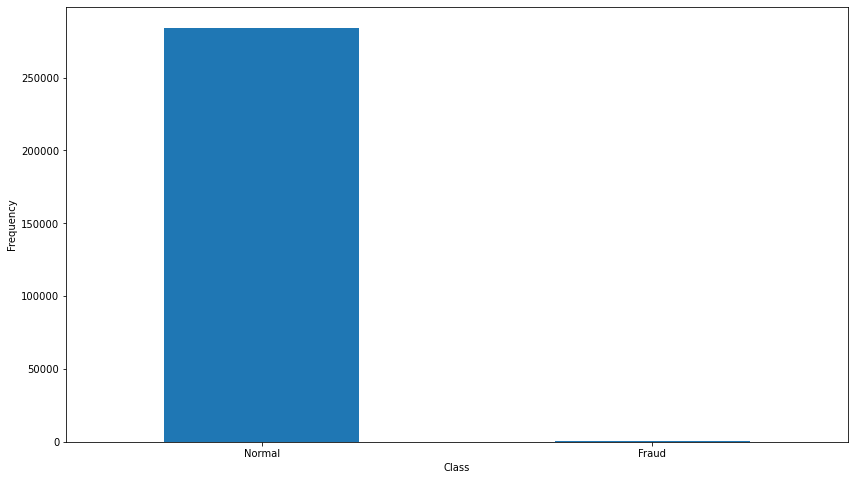

In [4]:
count_class = pd.value_counts(df['Class'], sort=True)

count_class.plot(kind="bar", rot=0)

plt.xticks(range(2),LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [5]:
df['Class'].value_counts() ### We can clearly see the Imbalance in the Data set

0    284315
1       492
Name: Class, dtype: int64

In [6]:
from imblearn.under_sampling import RandomUnderSampler

In [7]:
nm = RandomUnderSampler(random_state=42)  ### RandomUnderSampler does under sampling 
X_res, Y_res = nm.fit_resample(X,Y)

In [8]:
X_res.shape, Y_res.shape  ### We can check it by seeing the shape

((984, 30), (984,))

### OverSampling

In [10]:
from imblearn.over_sampling import RandomOverSampler

In [12]:
os = RandomOverSampler(random_state=42)

In [13]:
X_res, Y_res = os.fit_resample(X,Y)

In [14]:
X_res.shape , Y_res.shape

((568630, 30), (568630,))